# Exemplo de análise da estimação de parâmetros

Ler resultado da estimação de parâmetros

In [5]:
from modules.estimation.config.estimation_config import EstimationConfigModel
import pandas as pd
import pathlib

estimation_results_path = pathlib.Path("./out/estimation_exp_large_range")
target_results_path = pathlib.Path("./fixtures/validation/RochaData/num")

est_cfg_path = pathlib.Path("./fixtures/estimation_config.yaml")
estimation_cfg = EstimationConfigModel.from_file(est_cfg_path)

df = pd.read_csv(estimation_results_path / "estimation_results.csv")
df["A"] = df["p_ref"] * df["beta"]
df.loc[df["f_obj"] == df["f_obj"].min()]

,sim_lbl,sim_id,f_obj,k0,delta,beta,p_ref,A
6830,sim_6830,6830,0.015703,47.601104,0.622641,0.04983,63.640954,3.171253


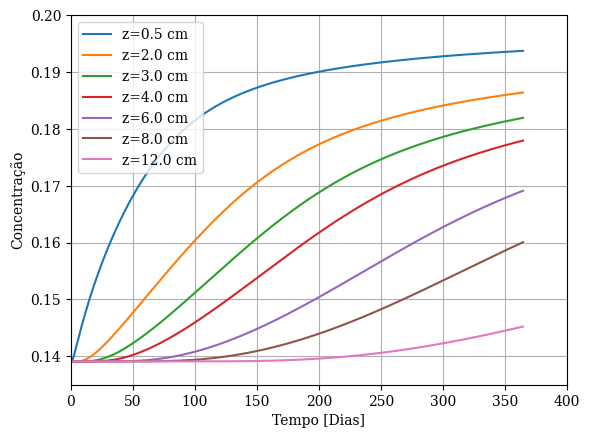

In [6]:
from modules.analysis.results_handler import ResultsHandler
import matplotlib.pyplot as plt

best_simulation_id = df.loc[df["f_obj"] == df["f_obj"].min()]["sim_id"]
results_handler = ResultsHandler(simulation_path=estimation_results_path / f"sim_{best_simulation_id.to_numpy()[0]}")

target_positions = [0.005, 0.02, 0.03, 0.04, 0.06, 0.08, 0.12]

time, concentration_profiles = results_handler.filter_for_positions(variable_name="Concentration", position_values=target_positions)

for position_lbl, concentration_arr in concentration_profiles.items():
    plt.plot(time / (3600 * 24), concentration_arr, label=position_lbl)

plt.xlabel('Tempo [Dias]')
plt.xlim(0,400)
plt.ylabel('Concentração')
plt.ylim(0.135,0.2)
plt.grid()

plt.legend()
plt.show()

Plot de convergência da função objetivo

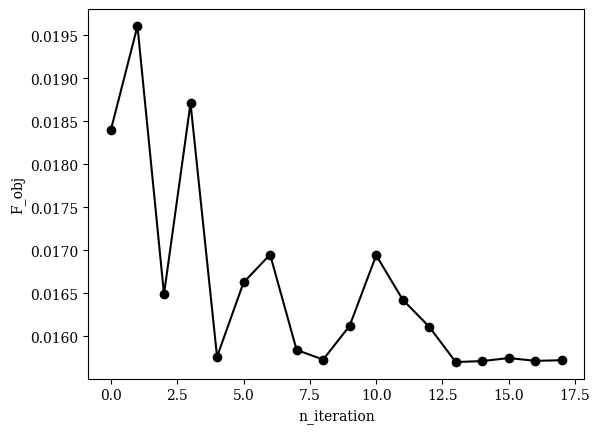

In [7]:
from modules.common.utils import create_folder_path
import matplotlib.pyplot as plt

plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
})

n_interations = estimation_cfg.PSO.n_iterations
n_particles = estimation_cfg.PSO.n_particles

image_folder = estimation_results_path / "images"
create_folder_path(image_folder)

fig, ax = plt.subplots()
f_obj_arr = []
for i in range(n_interations):
    filtered_df = df.loc[(df["sim_id"] >= i * n_particles) & (df["sim_id"] < (i + 1) * n_particles)]
    if filtered_df.empty:
        continue
    f_obj_arr.append(filtered_df["f_obj"].min())
ax.plot([i for i in range(n_interations)][:len(f_obj_arr)], f_obj_arr, marker='o', label=filtered_df['sim_lbl'], color="black")

ax.set_xlabel(r'n_iteration')
ax.set_ylabel(r'F_obj')

fig.savefig(image_folder / "f_obj.png")
plt.show()
fig.clear()
plt.close()

Particles plot

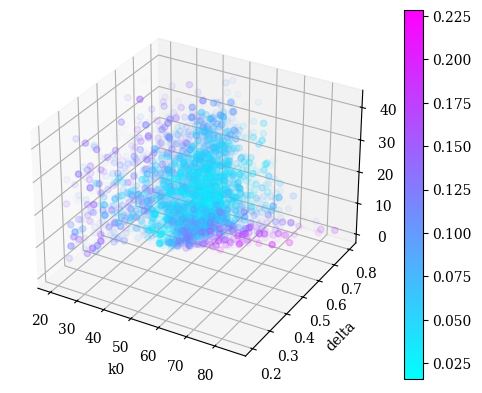

In [8]:
from modules.common.utils import create_folder_path
import matplotlib.pyplot as plt

n_interations = estimation_cfg.PSO.n_iterations
n_particles = estimation_cfg.PSO.n_particles

image_folder = estimation_results_path / "images"

create_folder_path(image_folder)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

df_cleaned = df.dropna()

colorbar = ax.scatter(df_cleaned["k0"], df_cleaned["delta"], df_cleaned["A"], marker='o', c=df_cleaned["f_obj"], cmap='cool', alpha=(1 - df_cleaned["f_obj"] / df_cleaned["f_obj"].max()) ** 10)
fig.colorbar(colorbar)

ax.set_xlabel('k0')
ax.set_ylabel('delta')
ax.set_zlabel('A')

fig.savefig(image_folder / "f_obj.png")
plt.show()
fig.clear()
plt.close()